Import tensorflow and other libraries needed

In [41]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Import dataset and load data

In [42]:
# Import dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Exploration

In [44]:
print("Training data exploration")
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print("Testing data exploration")
print(test_images.shape)
print(len(test_labels))

Training data exploration
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
Testing data exploration
(10000, 28, 28)
10000


## Data Preprocessing

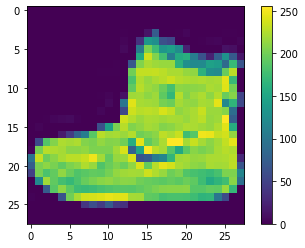

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pixels of all images range to 255, so scale these down to be a value between 0 and 1. We can do this by dividing by 255.
Also make sure to do the same operations to both training and testing set for uniformity.

In [46]:
train_images = train_images/255.0
test_images = test_images/255.0

Show the first 25 images from training set with class name

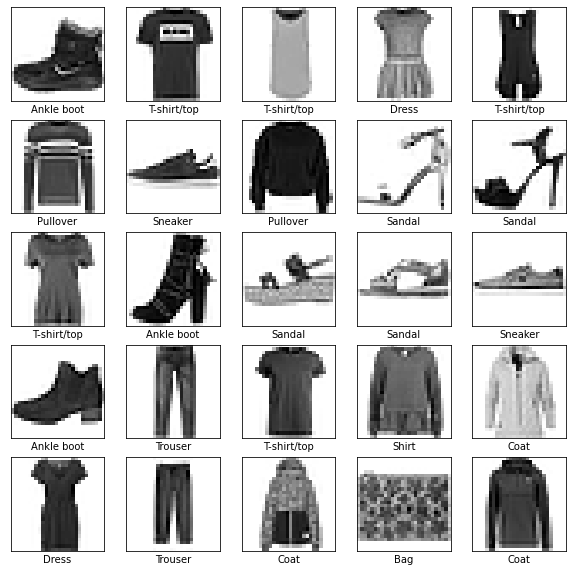

In [47]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build model

Layers extract representations from data, and most of the process of deep learning is chaining together these layers.

In [48]:
model = keras.Sequential([
    # transform format of images from 2D array to 1D
    keras.layers.Flatten(input_shape=(28, 28)),
    # fully connected neural layers
    # each node contains score that says an image belongs to one of the 10 classes
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## Compile model

We need a loss function (measures accuracy during training, want to minimize function to put the model in the right direction), optimizer (how the model is updated based on loss function), metrics (monitors training and testing steps).

In [49]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Train the model

In [50]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 689us/step - loss: 0.4911 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 1s 680us/step - loss: 0.3717 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.3328 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.3070 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.2900 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 1s 662us/step - loss: 0.2771 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.2644 - accuracy: 0.9032
Epoch 8/10
1875/1875 [==============================] - 1s 728us/step - loss: 0.2543 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 1s 720us/step - loss: 0.2461 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 1s 668u

Compare this to the test dataset.

In [52]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', test_acc*100)

313/313 - 0s - loss: 0.3273 - accuracy: 0.8853

Test accuracy: 88.52999806404114


There isn't that much of a difference between the training and testing accuracies, which indicate that overfitting may not be an issue.

## Make Predictions

Attach a softmax layer to convert logits (model's linear outputs) to probabilities.

In [55]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([2.2330083e-07, 1.2367658e-09, 4.3772513e-10, 4.5275850e-10,
       2.4638214e-07, 4.1960007e-05, 6.0752470e-08, 4.9755452e-03,
       7.7784861e-08, 9.9498194e-01], dtype=float32)

Predictions represent model's confidence that the image corresponds to the classes.

In [59]:
print("Predicted label:",np.argmax(predictions[0]))
print("Correct label:", test_labels[0])

Predicted label: 9
Correct label: 9


Graph the predictions, and look at the first one for verification.

In [61]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

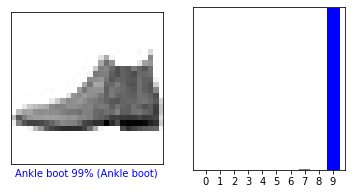

In [62]:
# replace i to look at different images in the dataset
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

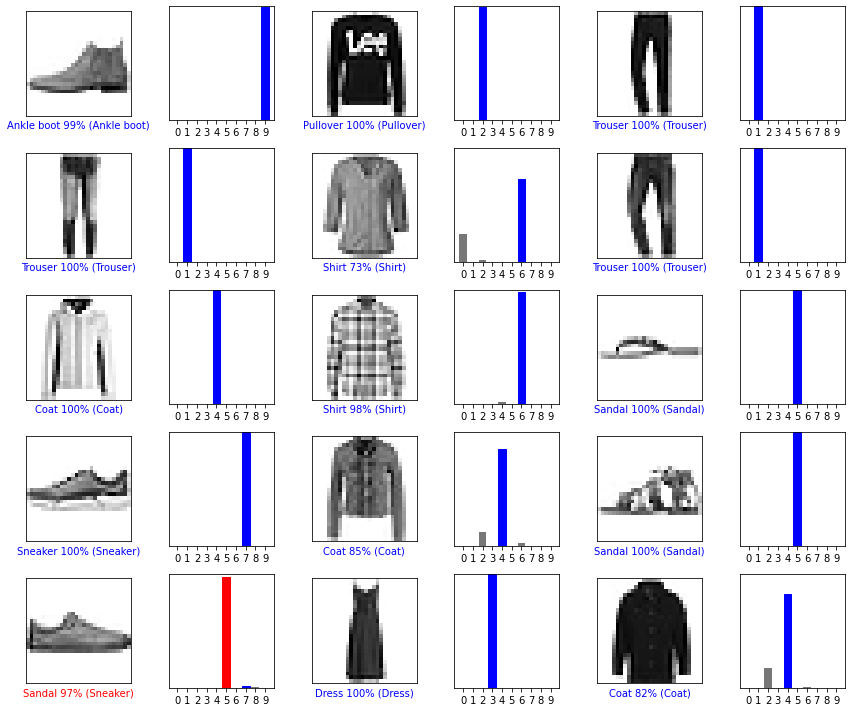

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use trained model

In [64]:
# Take an image from test dataset
img = test_images[1]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on multiple things, so make sure to add the image to a list!

In [65]:
# Add image to a batch
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [66]:
# make prediction
predictions_single = probability_model.predict(img)
print(predictions_single)

[[5.9393828e-06 2.7025281e-12 9.9680245e-01 5.0702957e-12 2.9061115e-03
  1.2725854e-11 2.8554848e-04 3.5676501e-12 1.8465699e-09 3.8357317e-11]]


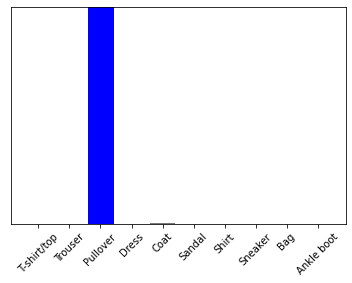

In [67]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [68]:
# take out one image in nested list from batch
np.argmax(predictions_single[0])

2